In [14]:
using Revise
using Plots
using TEQUILA
using MillerExtendedHarmonic

In [123]:
R0 = 1.5
Z0 = -0.1
a = 0.5
κ = 2.0
δ=0.4
Ψ(R, Z) = Ψmiller(R, Z; R0, Z0, a, κ, δ)
bnd_miller = MXH(R0, Z0, a/R0, κ, 0.0, [0.0], [asin(0.4)])

R0: 1.5
Z0: -0.1
ϵ: 0.3333333333333333
κ: 2.0
c0: 0.0
c: [0.0]
s: [0.41151684606748806]


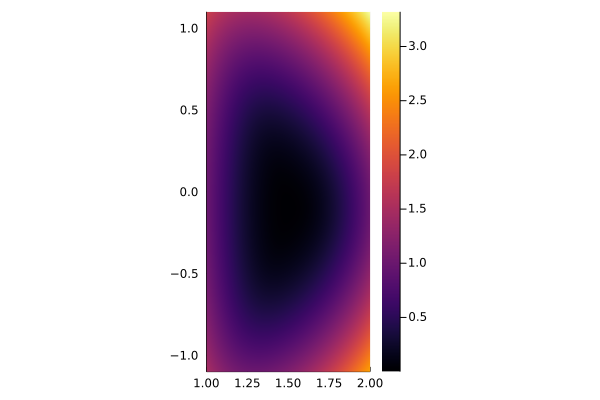

In [104]:
Rs = range(1.0, 2.0, 1001)
Zs = range(-1.1, 1.1, 1001)
P = [Ψ(r,z) for z in Zs, r in Rs]
p = plot(aspect_ratio=:equal)
heatmap!(p, Rs, Zs, P)
plot!(p,xlim=(1,2), ylim=(-1.1,1.1))
display(p)

In [105]:
M = 3
R0 = 1.5
Z0 = -0.1
ϵ = 0.3
κ = 2.0
c0 = -0.05
c = [0.1, 0.1, 0.05]
s = [0.4, 0.1, 0.05]
boundary = MXH(R0, Z0, ϵ, κ, c0, c, s)

R0: 1.5
Z0: -0.1
ϵ: 0.3
κ: 2.0
c0: -0.05
c: [0.1, 0.1, 0.05]
s: [0.4, 0.1, 0.05]


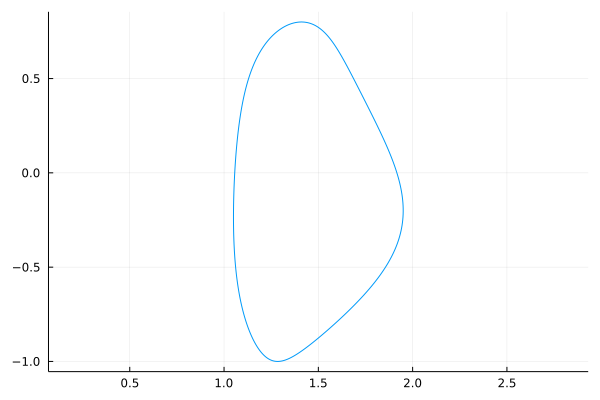

In [106]:
plot(boundary)

In [128]:
N = 21
shot = first_shot(Ψ, boundary, N, 3);

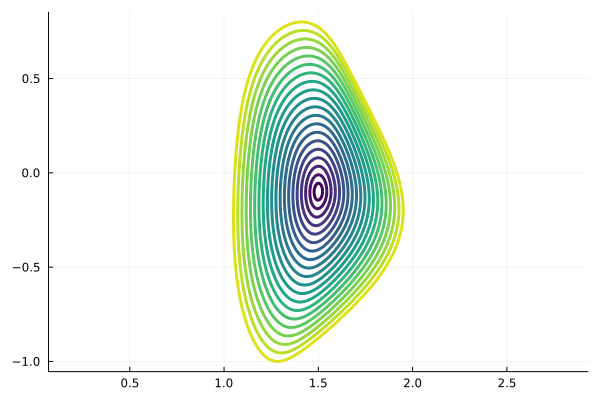

In [130]:
p = plot(aspect_ratio=:equal,color_palette=palette(:viridis,N))
for S in shot.surfaces[2:end]
    plot!(S,lw=3)
end
display(p)

In [131]:
using BenchmarkTools
S_FE = surfaces_FE(shot)

function test()
    xs = range(0,1,101)
    ts = range(0,2π,101)
    for x in xs
        for t in ts
            R_Z(S_FE..., x, t)
        end
    end
end

test (generic function with 1 method)

In [85]:
@btime test()

  317.820 ms (13016476 allocations: 220.87 MiB)


In [132]:
ρ_θ(shot, 1.483140815863633, 0.35)

2-element Vector{Float64}:
 0.4999999999999945
 1.5707963267949117

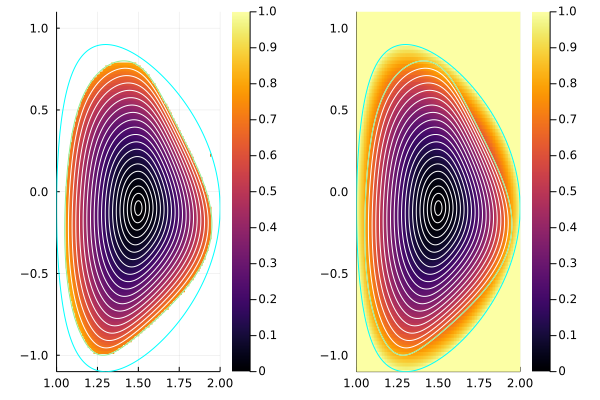

In [147]:
p1 = plot_shot(shot)
for surface in shot.surfaces[2:end]
    plot!(p1, surface,c=:white)
end
plot!(p1, boundary,c=:lightgreen)
plot!(p1, bnd_miller,c=:cyan,xlim=(1,2), ylim=(-1.1,1.1))

Rs = range(1.0, 2.0, 101)
Zs = range(-1.1, 1.1, 101)
P = [Ψ(r,z) for z in Zs, r in Rs]
p2 = plot(aspect_ratio=:equal)
heatmap!(p2, Rs, Zs, P, clim=(0,1))
plot!(p2,xlim=(1,2), ylim=(-1.1,1.1))
for surface in shot.surfaces[2:end]
    plot!(p2, surface,c=:white)
end
plot!(p2, boundary,c=:lightgreen)
plot!(p2, bnd_miller,c=:cyan,xlim=(1,2), ylim=(-1.1,1.1))
p = plot(p1,p2)
display(p)

In [145]:
ρ_θ(shot,1.25, -0.9)

2-element Vector{Float64}:
  0.9175305733507981
 -1.8213150975051262